In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os.path 
from os import listdir
import os, sys

In [5]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML
from IPython.html import widgets
from PIL import Image

/Users/madeleinejoseph/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [6]:
import numpy as np
import math as m
import csv

from numpy import trapz

In [7]:
path = "/Users/madeleinejoseph/Downloads/2.4kW 2.0mT/"
dirs = os.listdir(path)
wavelength = []
intensity = []
current = []
magnetic_field = []
for filename in dirs:
    print filename
    reader = csv.reader(open(path + filename), delimiter='\n')
    result = np.array(list(reader))
    for i in range(0,len(result)):
        p = result[i]
        dat = p[0].split()
        w = float(dat[0])
        i = float(dat[1])
        c = float(dat[2])
        b = float(dat[3])
        wavelength.append(w)
        intensity.append(i)
        current.append(c)
        magnetic_field.append(b)
                
len(wavelength), len(intensity), len(current), len(magnetic_field)


  

Port3 2.4kW 25sccm 2.0mT Forward 2017-08-27 no avg.txt
Port3 2.4kW 25sccm 2.0mT Reverse 2017-08-27 no avg.txt


(72960, 72960, 72960, 72960)

In [10]:
new_wavelength = [wavelength[i:i+3648] for i in range(0, len(wavelength), 3648)]
new_intensity = [intensity[i:i+3648] for i in range(0,len(intensity), 3648)]
new_b = [magnetic_field[i:i+3648] for i in range(0,len(magnetic_field), 3648)]
new_c = [current[i:i+3648] for i in range(0,len(current), 3648)]
#There are 3648 data points taken for each magnetic field, so every 3648 points there is a new magnetic field value 

In [11]:
b_field2 = []
current2 = []
for i in range(0, len(new_b)):
    a = new_b[i][4]
    b = new_c[i][1]
    b_field2.append(a)
    current2.append(b)
    
len(b_field2), len(current2), b_field2, current2

(20,
 20,
 [1216.0,
  1246.15,
  1276.3,
  1306.45,
  1336.6,
  1366.75,
  1396.9,
  1427.05,
  1457.2,
  1487.35,
  1487.35,
  1457.2,
  1427.05,
  1396.9,
  1366.75,
  1336.6,
  1306.45,
  1276.3,
  1246.15,
  1216.0],
 [400.0,
  410.0,
  420.0,
  430.0,
  440.0,
  450.0,
  460.0,
  470.0,
  480.0,
  490.0,
  490.0,
  480.0,
  470.0,
  460.0,
  450.0,
  440.0,
  430.0,
  420.0,
  410.0,
  400.0])

In [23]:
ioni_3 = [] #integrated ions in port 3
neui_3 = [] #integrated neutrals in port 3 

for i in range(0, len(new_wavelength)):
    x = new_wavelength[i]
    y = new_intensity[i]
    intgr_ion = np.trapz(y[85:1025],x[85:1025])
    intgr_neu = np.trapz(y[1550:3050],x[1550:3050])
    ioni_3.append(intgr_ion)
    neui_3.append(intgr_neu)
    



In [41]:
#spitting into forward and reverse 
ioni_3f = ioni_3[:10]
ioni_3r = ioni_3[10:]
neui_3f = neui_3[:10]
neui_3r = neui_3[10:]
b_field2f = b_field2[:10]
b_field2r = b_field2[10:]


In [35]:
#Normalizing 
ioni_3fn = ioni_3f/max(ioni_3f)
ioni_3rn = ioni_3r/max(ioni_3r)
neui_3fn = neui_3f/max(neui_3f)
neui_3rn = neui_3r/max(neui_3r)
#check to make sure everything worked out
ioni_3fn, ioni_3rn, neui_3fn, neui_3rn

(array([ 1.        ,  0.97287314,  0.94892248,  0.88224025,  0.8309211 ,
         0.36452114,  0.37898664,  0.39050868,  0.38284629,  0.36972636]),
 array([ 0.37831041,  0.37034387,  0.36236231,  0.35957722,  0.36872632,
         0.8603868 ,  0.9078911 ,  0.93165883,  0.9684578 ,  1.        ]),
 array([ 1.        ,  0.99686147,  0.99454991,  0.98586651,  0.97215145,
         0.71666852,  0.728199  ,  0.73082844,  0.71610431,  0.70173417]),
 array([ 0.68697881,  0.69005963,  0.69817736,  0.69869806,  0.70247852,
         0.96097056,  0.97556629,  0.98144545,  0.99259969,  1.        ]))

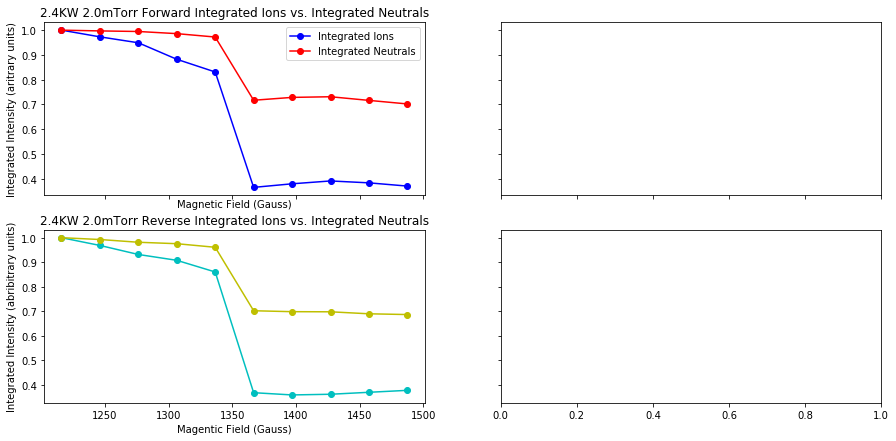

In [58]:
#PLOTTING
fg, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,7) )
    #this allows you to make the 4 plots
    #ax1 is top left plot, ax2 is top right plot, ax3 is bottom left......
ax1.plot(b_field2f,ioni_3fn, '-o', color='b', label='Integrated Ions')
ax1.plot(b_field2f,neui_3fn, '-o', color='r', label='Integrated Neutrals')
ax1.set_title('2.4KW 2.0mTorr Forward Integrated Ions vs. Integrated Neutrals')
ax1.set_xlabel('Magnetic Field (Gauss)')
ax1.set_ylabel('Integrated Intensity (aritrary units)')
ax1.legend()


ax3.plot(b_field2r,ioni_3rn, '-o', color='c', label='Integrated ions')
ax3.plot(b_field2r,neui_3rn, '-o', color='y', label='Integrated ions')
ax3.set_title('2.4KW 2.0mTorr Reverse Integrated Ions vs. Integrated Neutrals')
ax3.set_xlabel('Magentic Field (Gauss)')
ax3.set_ylabel('Integrated Intensity (abribitrary units)')
